### Regression Exercise 
# Moneyball The NBA

##### Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_train.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


#### Check for Nulls.

In [4]:
# Check for Nulls.
print(df.isna().sum() == 0)

SeasonEnd    True
Team         True
Playoffs     True
W            True
PTS          True
oppPTS       True
FG           True
FGA          True
2P           True
2PA          True
3P           True
3PA          True
FT           True
FTA          True
ORB          True
DRB          True
AST          True
STL          True
BLK          True
TOV          True
dtype: bool


#### Check for Duplicates

In [5]:
# Check for Duplicates
df.duplicated().sum()

0

#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [57]:
def inspect_dataframe(df):
    print('\n', '#'*79)
    ###############################################################################
    print('CHECKING SHAPE AND SIZE:  df.shape', df.shape)
    print('\n', '#'*79)

    ###############################################################################
    print( "CHEKCING NULLS", "print(df.isnull().sum())")
    print(df.isnull().sum())
    na_sum = (df.isnull().sum(axis = 0).sum()==0)
    print('\n', '#'*79)

    ###############################################################################
    print("CHECKING DUPES, df.duplicated().sum()")
    du_sum = (df.duplicated().sum()==0) 
    print(df.duplicated().sum())    
    
    if (na_sum and du_sum):
        return "good stuff."
    else: 
        return "not good stuff."

print(inspect_dataframe(df))


 ###############################################################################
CHECKING SHAPE AND SIZE:  df.shape (835, 20)

 ###############################################################################
CHEKCING NULLS print(df.isnull().sum())
SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

 ###############################################################################
CHECKING DUPES, df.duplicated().sum()
0
good stuff.


#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

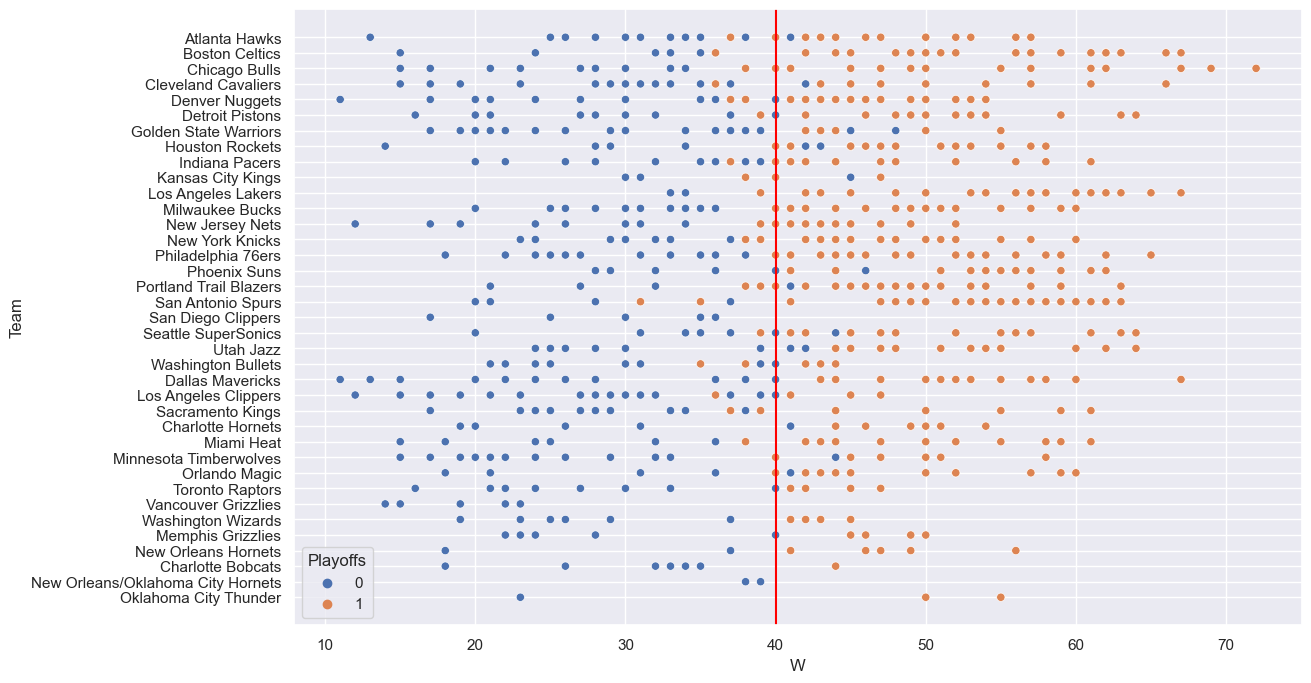

In [65]:
sns.set()
plt.figure(figsize=(13, 8))
ax = sns.scatterplot(df, x='W', y='Team', hue='Playoffs')
ax.axvline(x=40, color='red')

#### Take a rough estimate, and now use that moving forward.  



In [90]:
WINS_NEED_TO_MAKE_PLAYOFFS = 40  # Just a rough estimation

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

<Axes: xlabel='FTA', ylabel='PTS'>

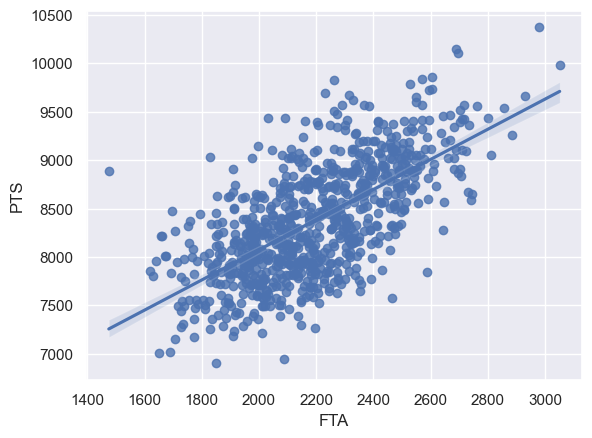

In [68]:
sns.regplot(df, x='FTA', y='PTS')

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

['SeasonEnd', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV']


C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

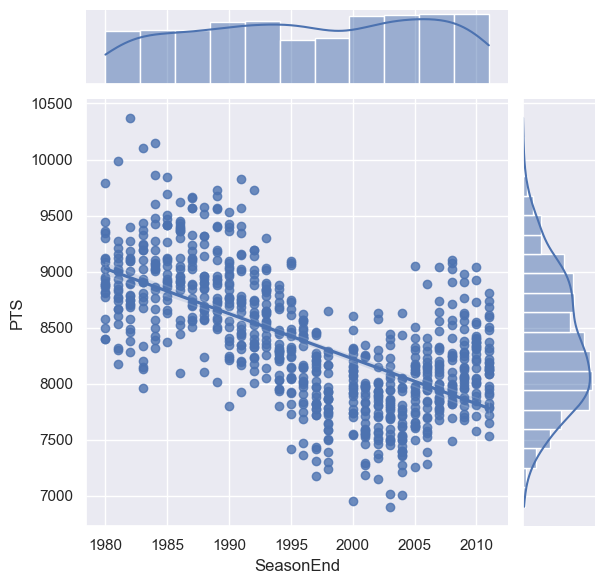

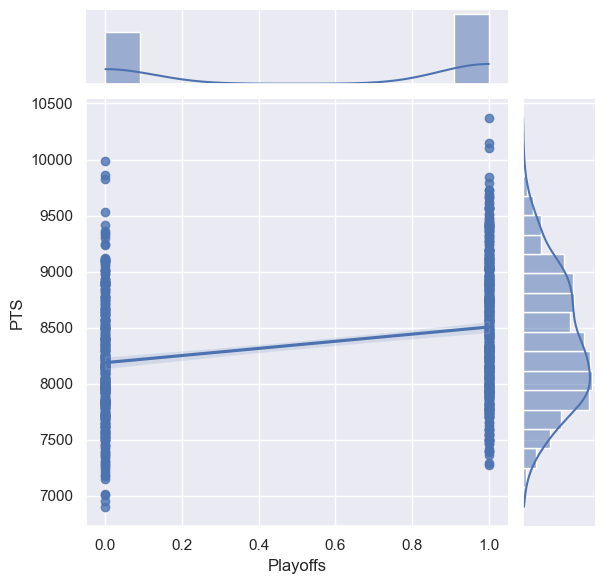

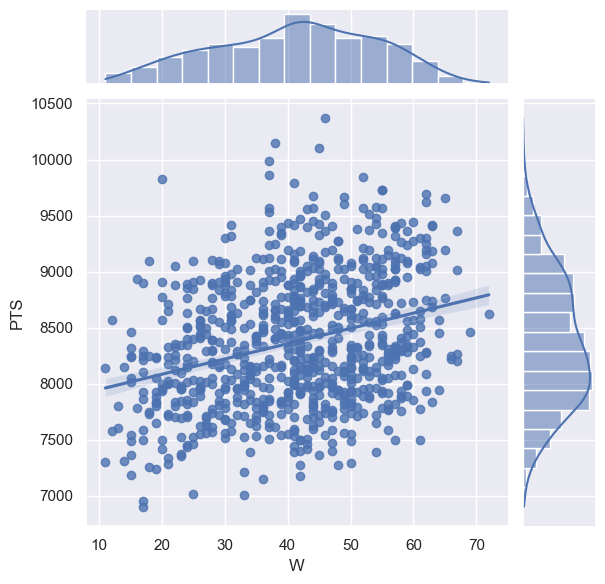

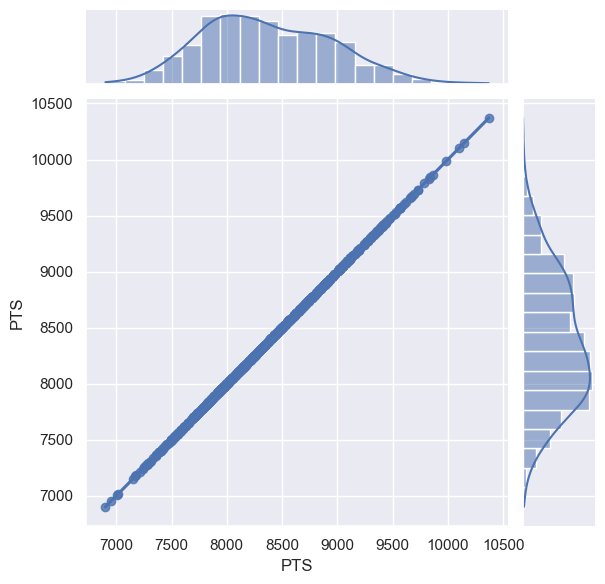

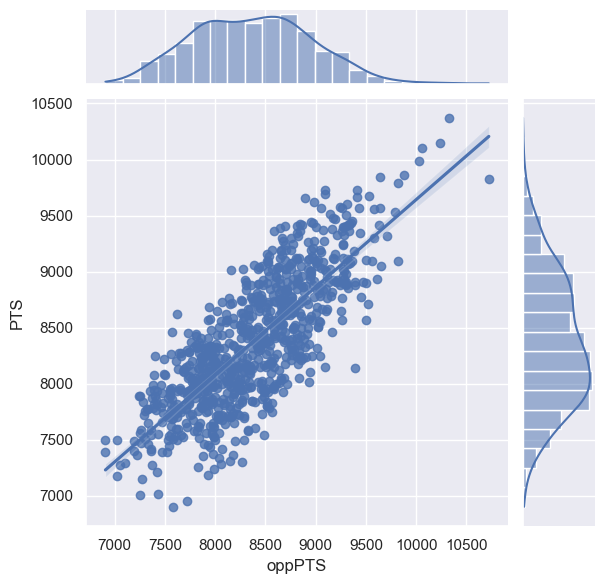

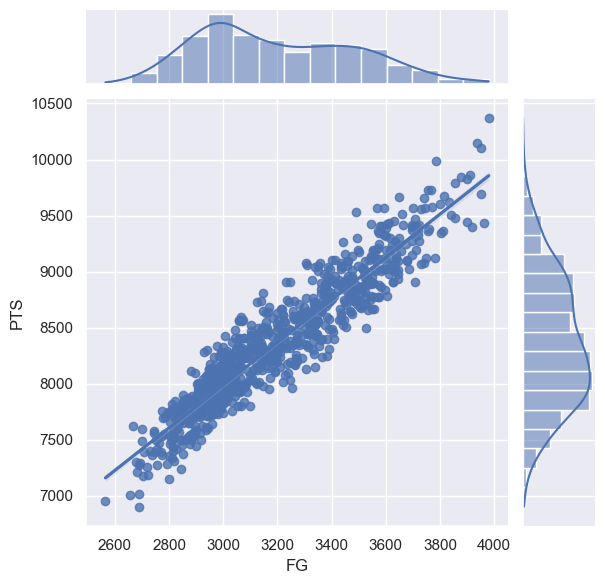

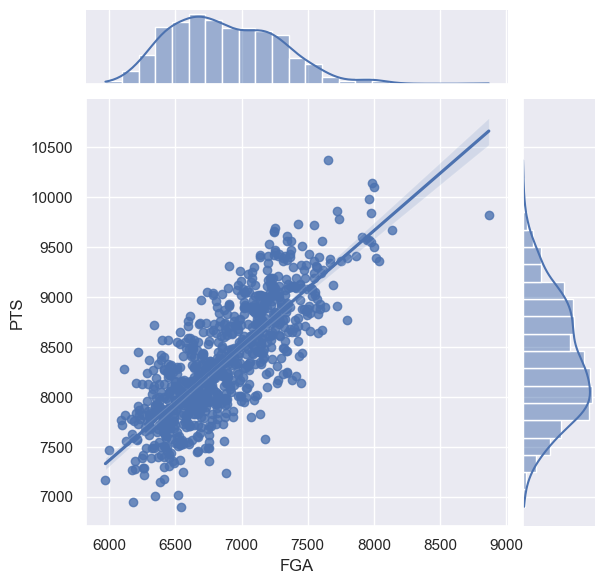

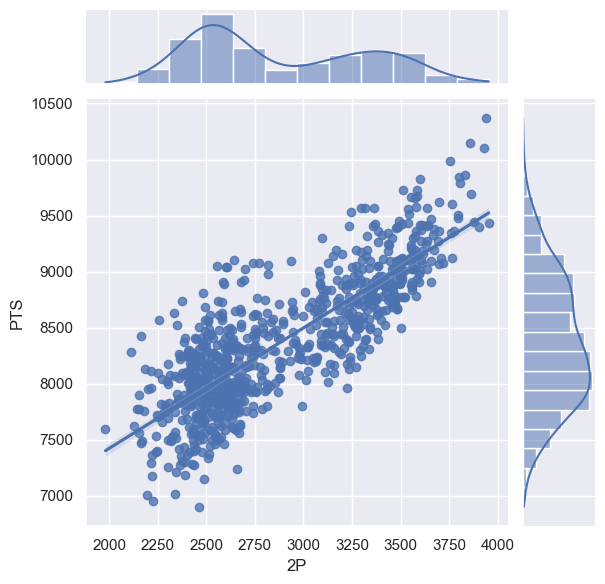

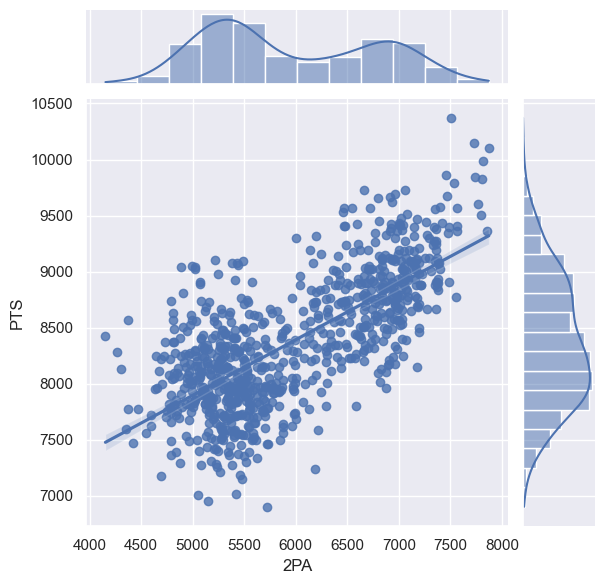

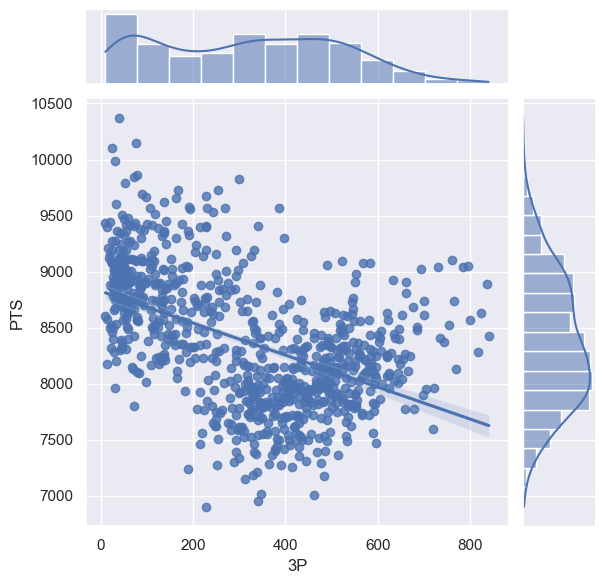

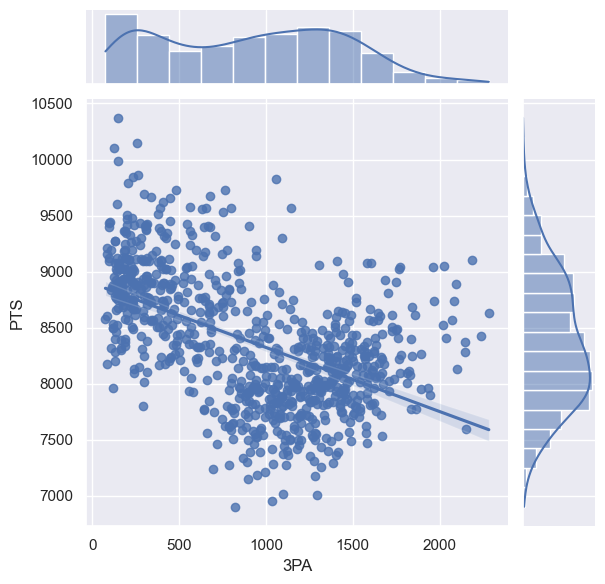

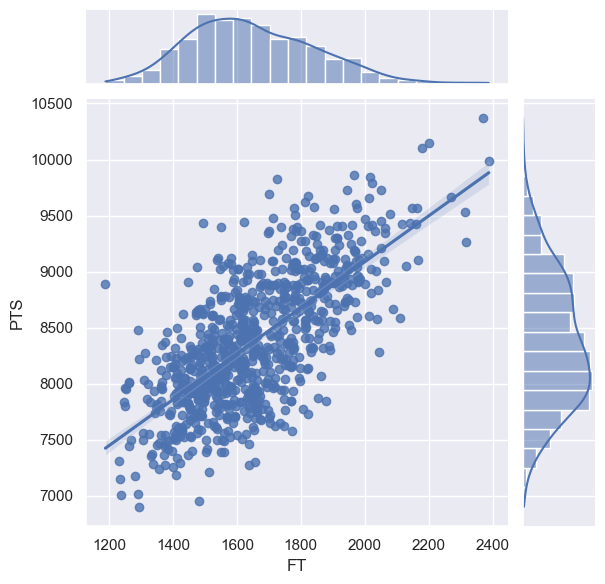

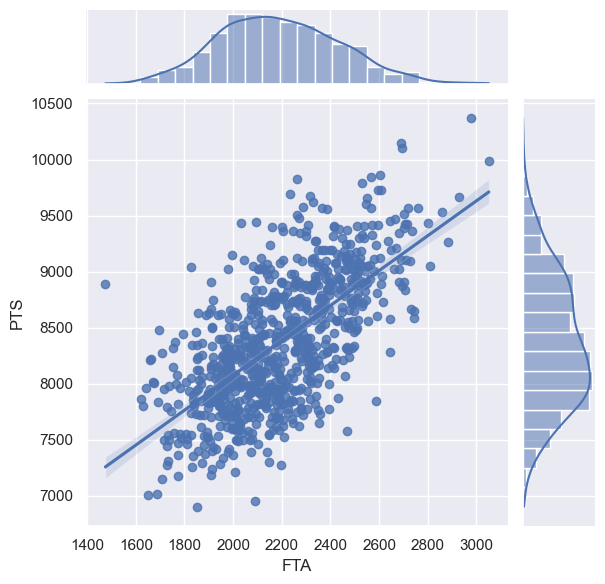

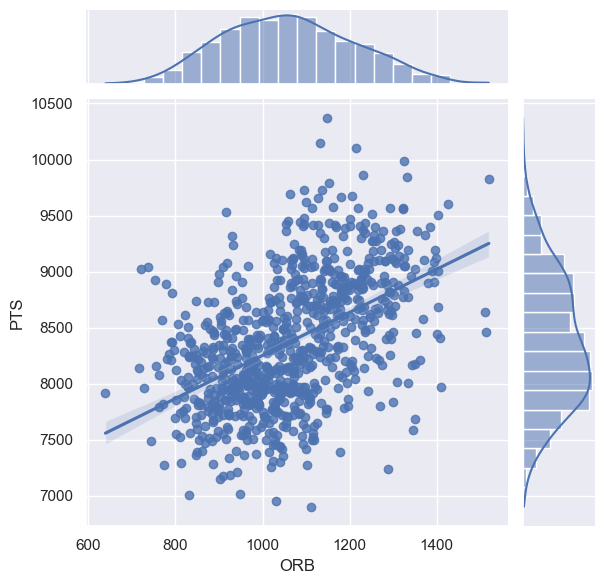

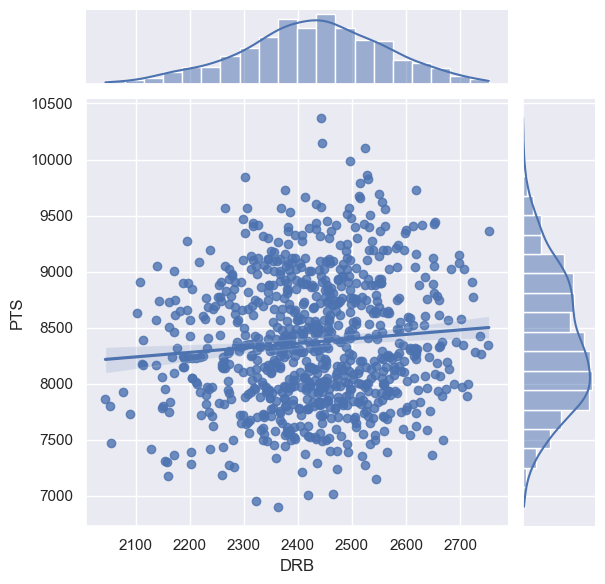

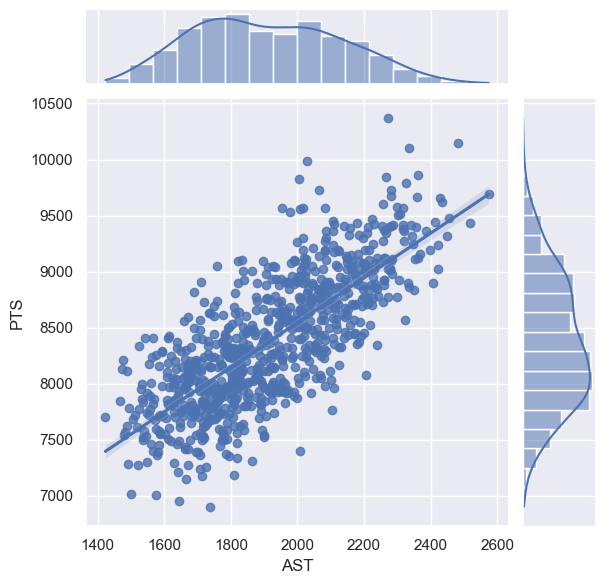

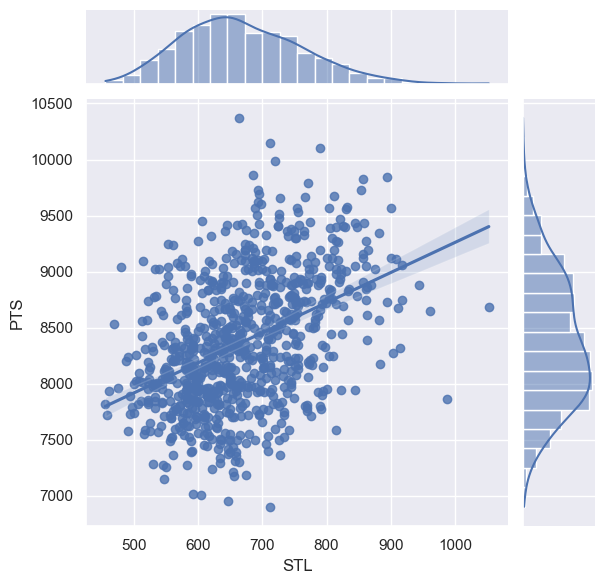

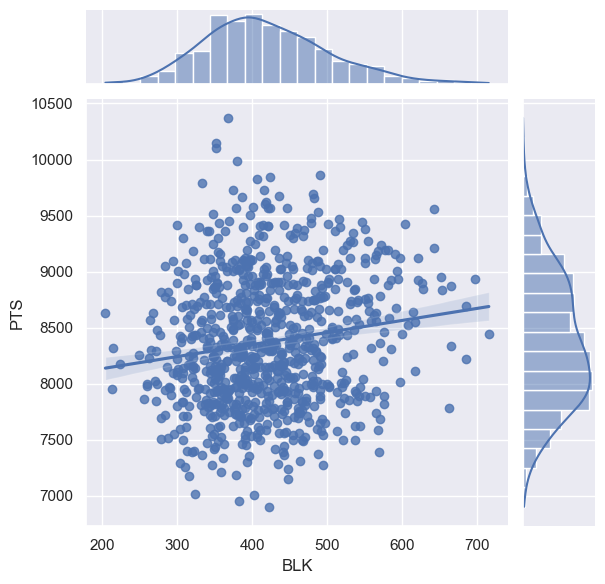

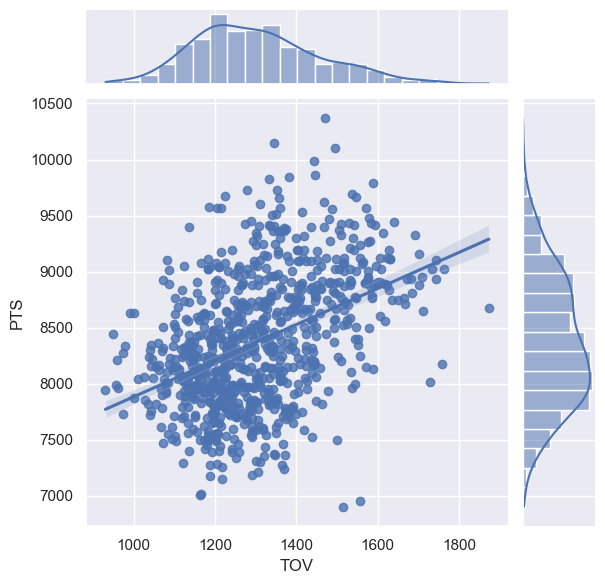

In [70]:
num_cols = list(df.select_dtypes(include='number').columns)
print(num_cols)
for col in num_cols:
    sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg")

In [93]:
import statsmodels.api as sm

In [94]:
dependent_variable = 'PTS'
independent_variables = ['2PA', '3PA', 'FTA']
# independent_variables = ['2P', '3P', 'FG', 'FT']
# independent_variables = ['FG', 'FGA', '2P', '3P', 'AST']

X = df[independent_variables]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X = sm.add_constant(X)

In [95]:
model_wins = sm.OLS(y_train, X_train).fit()
y_pred = model_wins.predict(X_test) 

In [87]:
print(model_wins.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PTS   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.074e+05
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:39:33   Log-Likelihood:                         -4698.4
No. Observations:                 668   AIC:                                      9403.
Df Residuals:                     665   BIC:                                      9416.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [91]:
model_wins_root_mean_squared_error = rmse(y_test, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', model_wins_root_mean_squared_error)
print( 'RMSEs Percentage off average:', ((model_wins_root_mean_squared_error / y.mean())*100).round(2))

###############################################################################
Dependent Variable PTS average:  8370.239520958085
RMSE: 259.81722472441925
RMSEs Percentage off average: 3.1


In [99]:
lr_win = LinearRegression()
lr_win.fit(X_train, y_train)
y_pred = lr_win.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared: ', r_squared)
mse = metrics.mean_squared_error(y_test,y_pred, squared=False)
print('Mean squared error: ', mse)

R-Squared:  0.7488552611176256
Mean squared error:  251.91700878235028


C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\po530\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2623.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:12:27   Log-Likelihood:                -5407.9
No. Observations:                 835   AIC:                         1.083e+04
Df Residuals:                     830   BIC:                         1.085e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1587.8714    129.317     12.279      0.0

C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

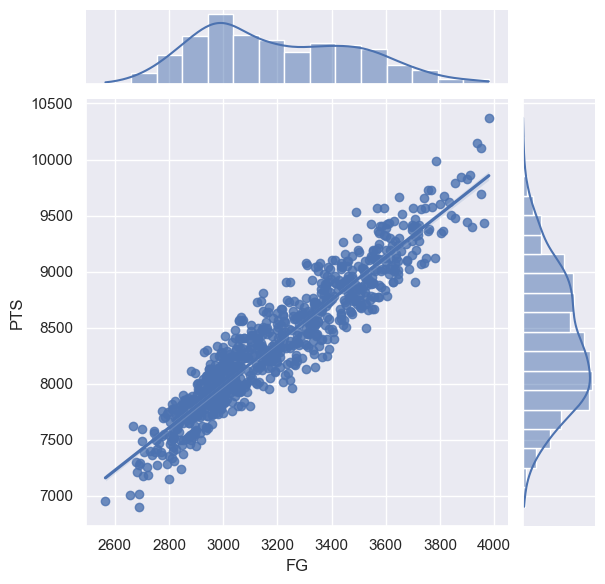

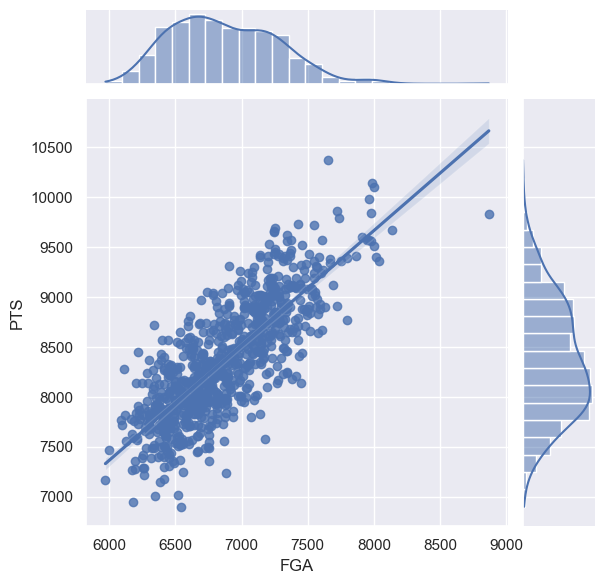

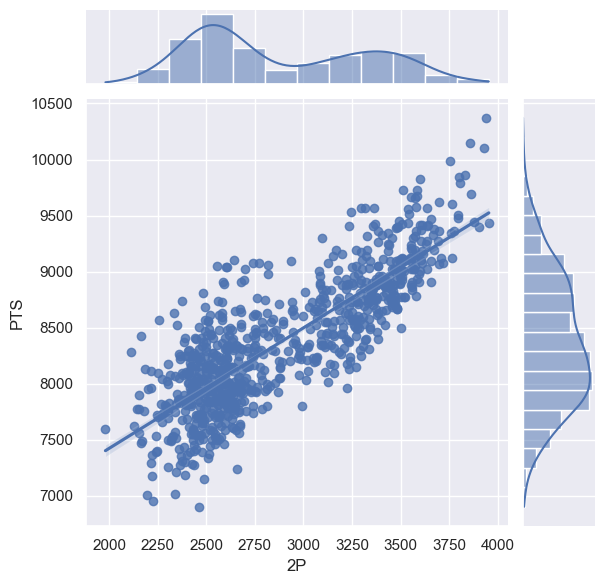

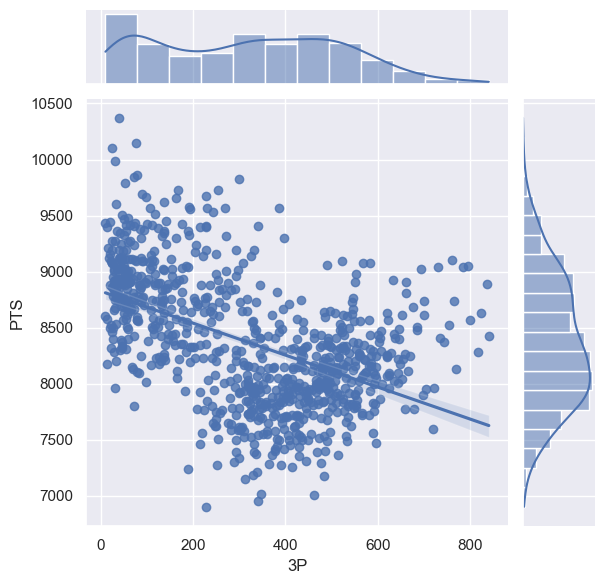

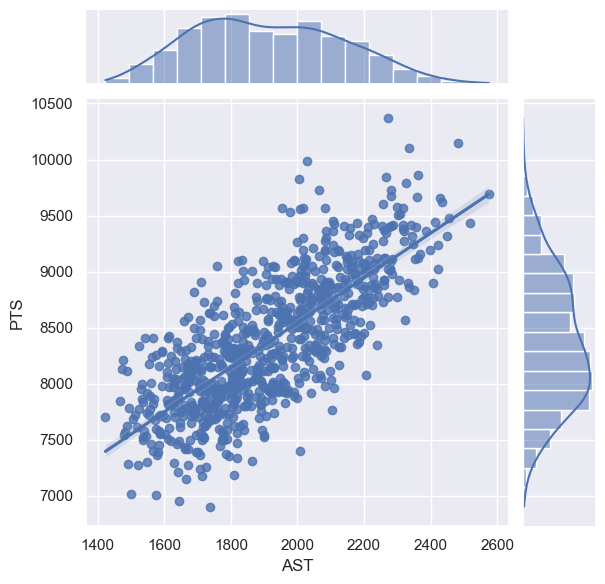

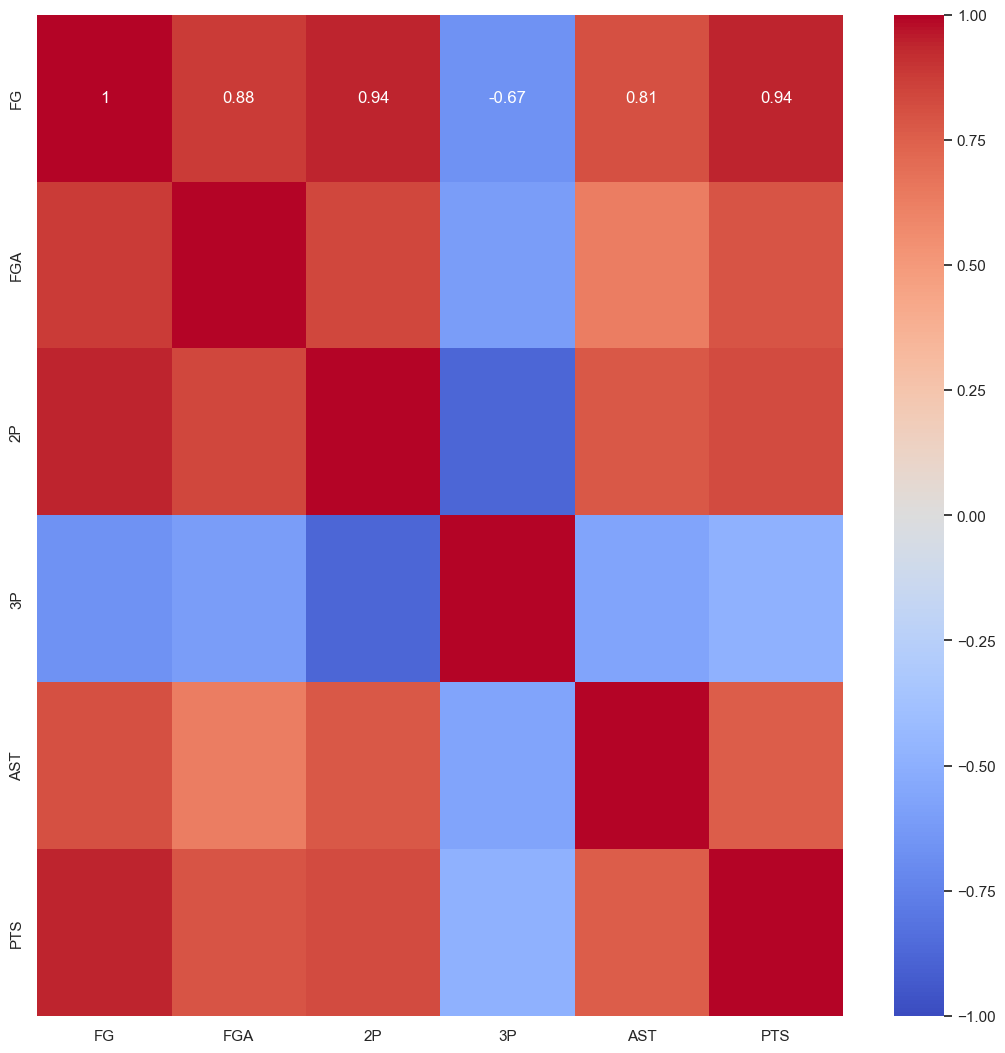

###############################################################################
Variance Inflaction Factors
        const   FG       FGA   2P   3P       AST
0  561.584307  inf  4.913284  inf  inf  3.267283
###############################################################################
###############################################################################
Checking Normality


C:\Users\po530\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\po530\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


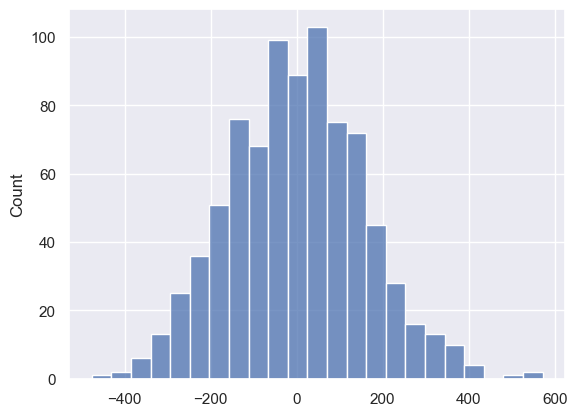

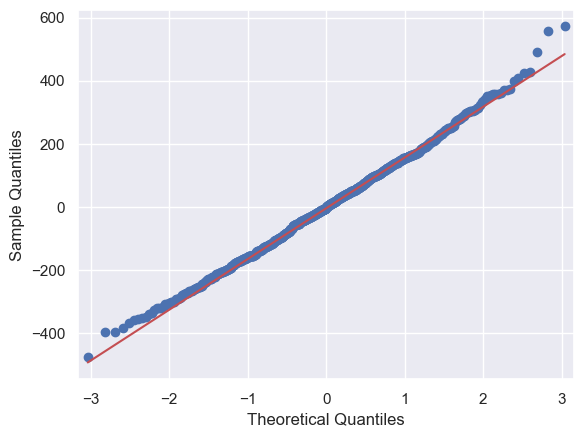

###############################################################################


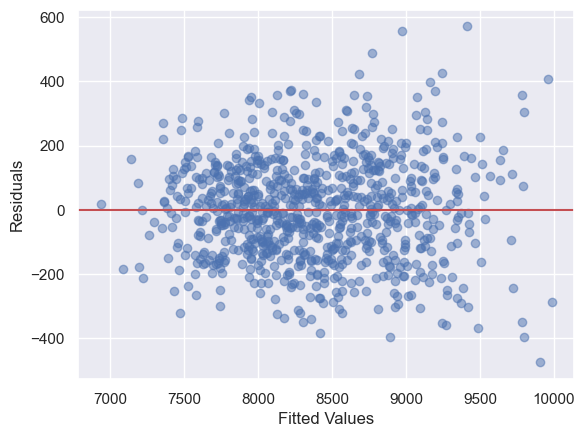

In [98]:
import CTPLIB as ctp

dependent_variable = 'PTS'
independent_variables = ['FG', 'FGA', '2P', '3P', 'AST']

ctp_model = ctp.CTP_LinReg(df=df, independent_variables=independent_variables, dependent_variable=dependent_variable)
ctp_model.run_all()